In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df2 = df.drop_duplicates()

In [4]:
df3 = df2.fillna(3)

In [5]:
df3.shape

(5904, 5)

In [6]:
df3['location'] = df3['location'].str.lower()
df3['location'] = df3['location'].str.split(',',n=0,expand=True)

In [7]:
df3

,location,bedrooms,bath,size,price
0,motijheelextension,3.0,2.0,1750,9500000
1,motijheelextension,3.0,2.0,1615,9500000
3,sector5,2.0,2.0,807,5200000
4,blockg,4.0,4.0,3100,40000000
5,eastmaniknagar,3.0,3.0,1300,6600000
...,...,...,...,...,...
8715,middlepaikpara,3.0,2.0,1025,4000000
8716,sector13,4.0,4.0,3000,32500000
8717,blockf,3.0,4.0,1695,13500000
8718,section12,3.0,3.0,1150,4500000


In [8]:
df4 = df3.copy()

In [9]:
df4.shape

(5904, 5)

In [10]:
df5 = df4[df4['bedrooms']<20]

In [11]:
df5.shape

(5878, 5)

In [12]:
df6 = df5[df5['bath']<20]

In [13]:
df6.shape

(5878, 5)

In [48]:
df7 = df6[df6['size']<3500]

In [49]:
df7.shape

(5627, 5)

In [50]:
df8 = df7[df7['size']>300]

In [51]:
df8.shape

(5620, 5)

In [52]:
df9 = df8[df8['price']<30000000]

In [53]:
df9.shape

(5371, 5)

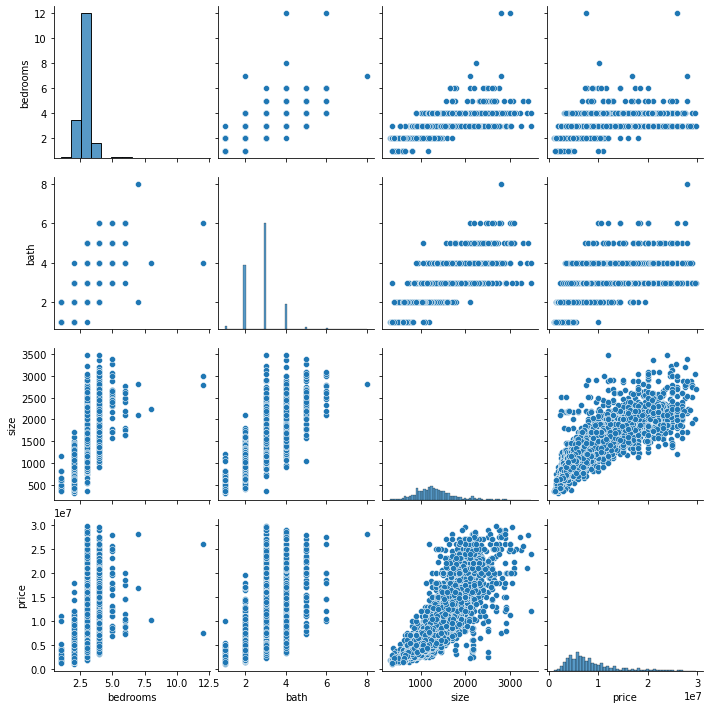

In [54]:
sns.pairplot(df9)

In [55]:
location_stats = df9.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats.head()

location
sector10     178
pallabi      140
ashkona      102
section12    102
blockf        98
Name: location, dtype: int64

In [56]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10.head()

location
taliofficeroad                 10
shahkabirmazarroad             10
dakhshinpara                   10
shyamolihousing(2ndproject)    10
nurjahanroad                   10
Name: location, dtype: int64

In [57]:
df9.location=df9.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df9.location.unique())

C:\Users\fahim\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


119

In [58]:
dummies = pd.get_dummies(df9.location)
dummies.head()

,ahmednagar,ashkona,ashulia,atibazar,baitulamanhousingsociety,bankcolony,banktown,bashabomadartekroad,blocka,blockb,...,tajmahalroad,taltola,tejkunipara,uttarbadda,wari,westagargaon,westdhanmondiandshangkar,westkazipara,westrampura,westshewrapara
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df10 = pd.concat([df9,dummies.drop('other',axis='columns')],axis='columns')

In [60]:
df10 = df10.drop('location',axis='columns')

In [61]:
X = df10.drop(['price'],axis='columns')
X.head(3)

,bedrooms,bath,size,ahmednagar,ashkona,ashulia,atibazar,baitulamanhousingsociety,bankcolony,banktown,...,tajmahalroad,taltola,tejkunipara,uttarbadda,wari,westagargaon,westdhanmondiandshangkar,westkazipara,westrampura,westshewrapara
0,3.0,2.0,1750,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,2.0,1615,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,807,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
y = df10.price
y.head(3)

0    9500000
1    9500000
3    5200000
Name: price, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [64]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7474150781422635

In [65]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.73488034, 0.74422344, 0.76417867, 0.73020748, 0.70052698])

In [66]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.734803,{'normalize': True}
1,lasso,0.734804,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.541566,"{'criterion': 'mse', 'splitter': 'random'}"


In [77]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [78]:
predict_price('sector5',15, 2, 4)

-14200761.609964272

In [79]:
df9['location'].unique()

array(['other', 'sector5', 'bochila', 'eastrampura', 'pirerbag',
       'southmonipur', 'blockj', 'khilbaritek', 'nobodoyhousingsociety',
       'merulbadda', 'blocke', 'southbanasreeproject', 'kallyanpur',
       'roadno2', 'blocka', 'uttarbadda', 'middlemonipur', 'blockh',
       'malibagbazarrd', 'northadabor', 'section2', 'eastkazipara',
       'blockd', 'blockg', 'rayerbazaar', 'eastmonipur',
       'baitulamanhousingsociety', 'sector3', 'roadno3',
       'pcculturehousing', 'northbashabo', 'roadno4', 'section10',
       'blockf', 'section1', 'ashkona', 'goran', 'monipuripara', 'blockc',
       'meradia', 'greenroad', 'southbashabo', 'southkeraniganj',
       'atibazar', 'shahjadpur', 'ahmednagar', 'kadamtala', 'section6',
       'southbadda', 'middlebadda', 'matikata',
       'westdhanmondiandshangkar', 'sector6', 'pallabi', 'sector10',
       'shiddheswarilane', 'westrampura', 'blockb', 'section11',
       'sector7', 'sector13', 'blocki', 'elephantroad', 'nayatola',
       'mirp

IndexError: invalid index to scalar variable.